## This is a prediction notebook of weather it will rain of not tomorrow depending on the features below
### the dataset link is https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

1. Location: The common name of the location of the weather station
2. MinTemp: The minimum temperature in degrees celsius
3. MaxTemp: The maximum temperature in degrees celsius
4. Rainfall: The amount of rainfall recorded for the day in mm
5. Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
6. Sunshine: The number of hours of bright sunshine in the day.
7. WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
8. WindDir9am: Direction of the wind at 9am
9. WindDir3pm: Direction of the wind at 3pm
10. WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
11. WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
12. Humidity9am: Humidity (percent) at 9am
13. Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
14. Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
15. Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many
16. Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm.
17. Temp9am: Temperature (degrees C) at 9am
18. Temp3pm: Temperature (degrees C) at 3pm
19. RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
20. Date: The date of observation

### Target
21. RainTomorrow: will it rain tomorrow or not

### by following these steps we should be able to figure it out
 - (1.1) Deviding date into more features
 - (1.2) Distinguising between numerical and ccategorical features
 - (1.3) Dealing with null values
 - (1.4) Dealing with outliers values
 - (2) Understanding the data
 - (3.1) mapping binary features to 0/1
 - (3.2) label encoding non-binary value features
 - (4) Feature Selection
 - (4.1) selecting features based on thier imortance (using RandomForestClassifier)
 - (4.2) train test splitting
 - (4.3) feature scalling
 - (5) Dealing with imbalanced classes
 - (5.1) Under Sampling
 - (5.2) Over Sampling (SMOTE)
 - (5.3) Over Sampling (SKlearn resample)
 - (5.4) Leaving The data As it is
 - (6) Model Selection / Parameter tuning

In [184]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, recall_score, precision_score,f1_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
palette=["#8282ff", "#4746e0"]

In [228]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 1- Data Cleaning

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [189]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

 - (1.1) Deviding date into more features

In [229]:
df['Date']= pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_num'] = df['Date'].dt.day
df.drop(columns=['Date'], axis = 1, inplace=True)

 - (1.2) Distinguising between numerical and ccategorical features

In [230]:
numerical_col = df._get_numeric_data().columns
categorical_col= list(set(df.columns) - set(numerical_col))

- (1.3) Dealing with null values

In [192]:
(df.isnull().sum()*100)/len(df)

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
year              0.000000
month             0.000000
day_num           0.000000
dtype: float64

In [231]:
# Approach one filling missing values with mean / mode
for (columnName, columnData) in df.items():
    if columnName in numerical_col:
        df[columnName]=df[columnName].fillna(df[columnName].mean())
    elif columnName in categorical_col:
        df[columnName]=df[columnName].fillna(df[columnName].mode()[0])

- (1.4) Dealing with outliers values

In [232]:
#Removing outliers using Z-score
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
df= df[(z < 3).all(axis=1)]
print(df.shape)

(136608, 25)


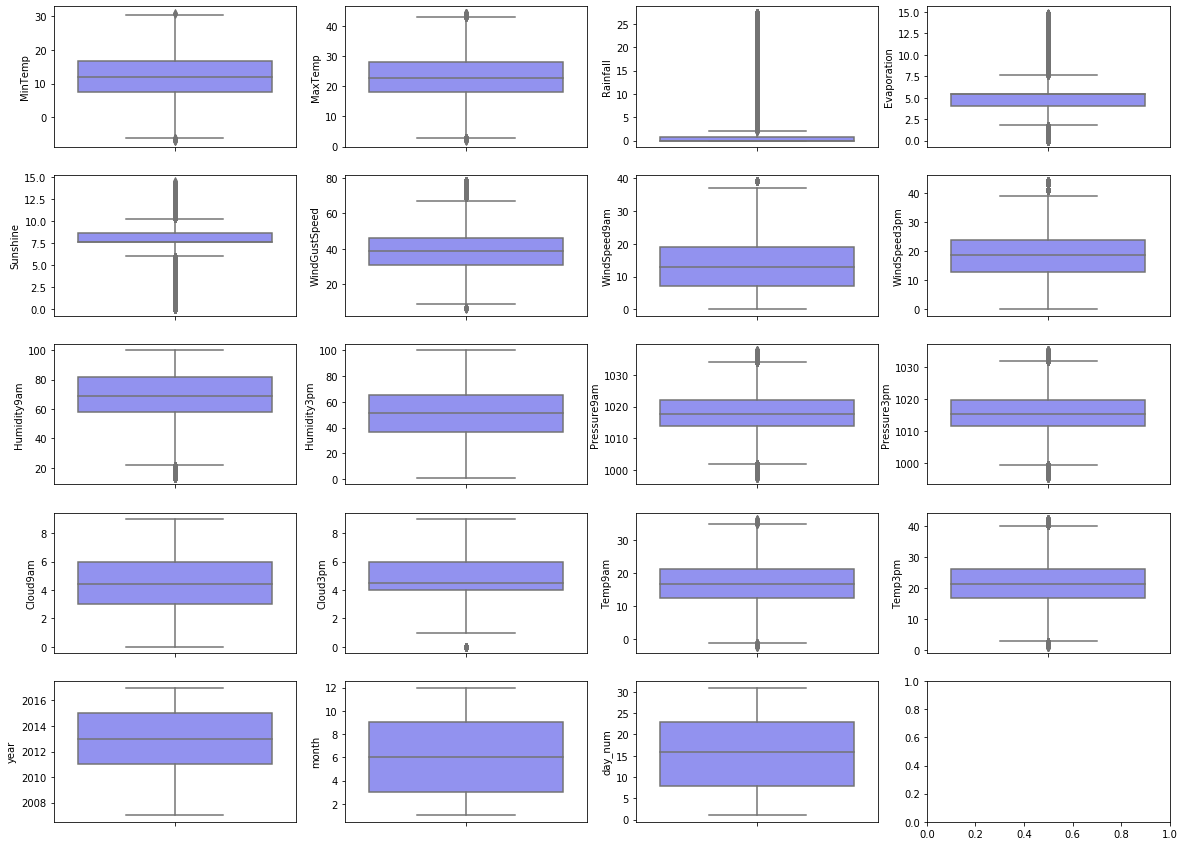

In [195]:
fig, axs = plt.subplots(ncols = 4, nrows = 5, figsize = (20, 15))
index = 0

axs = axs.flatten()
for col in numerical_col:
    sns.boxplot(y=df[col], ax = axs[index],palette=["#8282ff", "#4746e0"])
    index += 1

## 2- Understanding the data

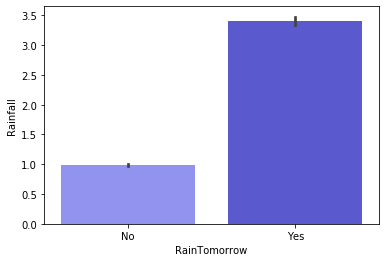

In [196]:
# the plot shows that the more rainfall today the more the chances that there will be rain tommo
sns.barplot(data=df,y='Rainfall',x='RainTomorrow',palette=palette)

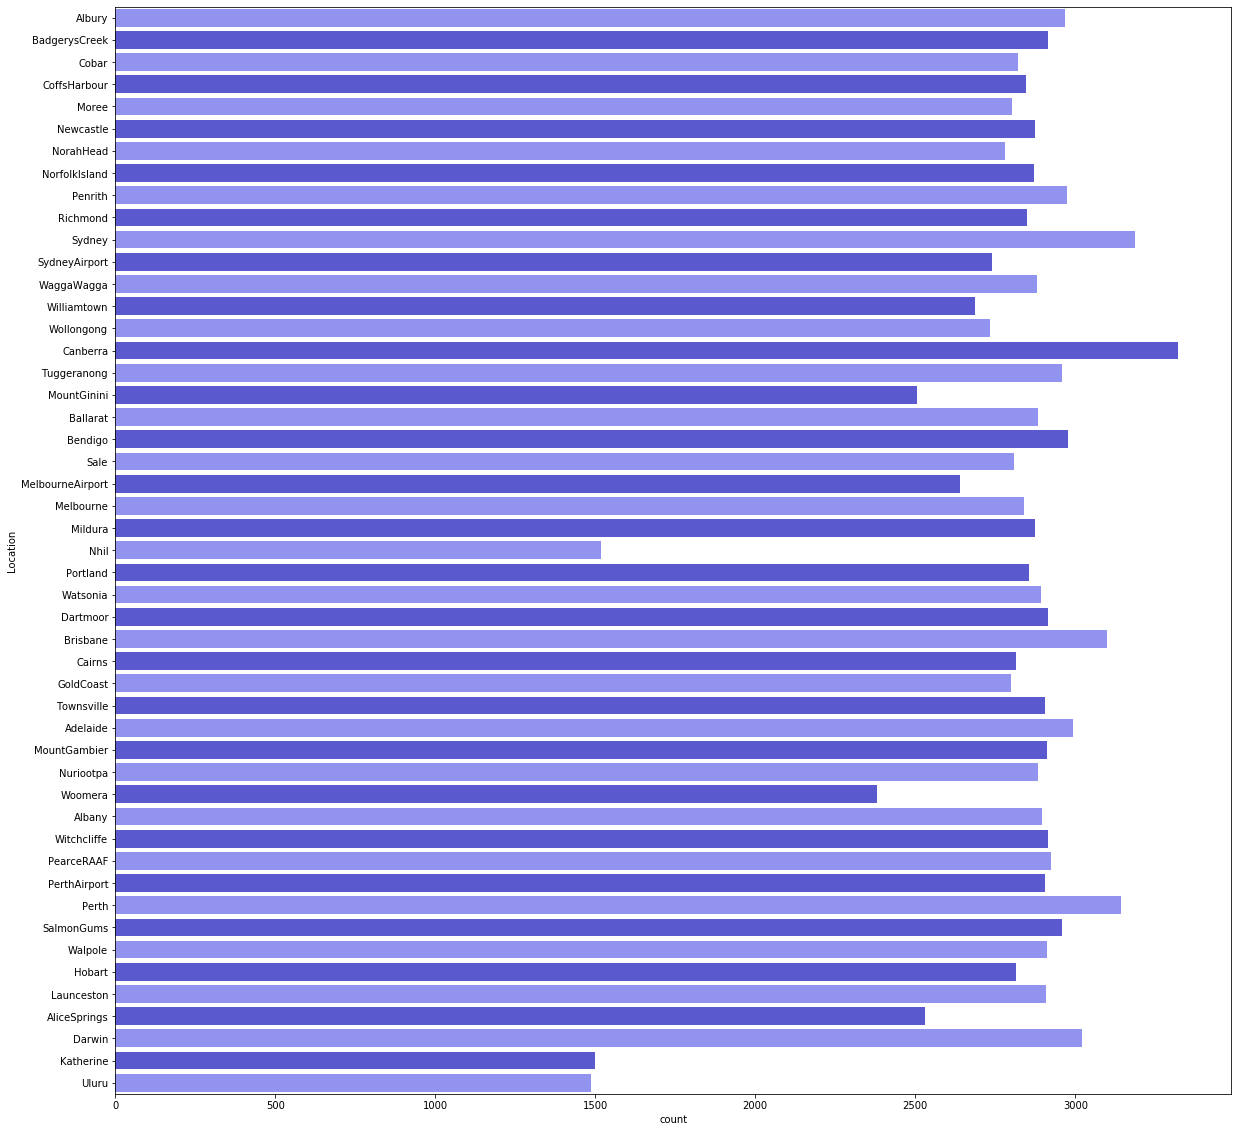

In [197]:
# All cities have the same numbers of samples except (Katherine,Uluru and Nhil) so they will not be 
# compared with other cities due to low sample size
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(data=df,y='Location',palette=palette)

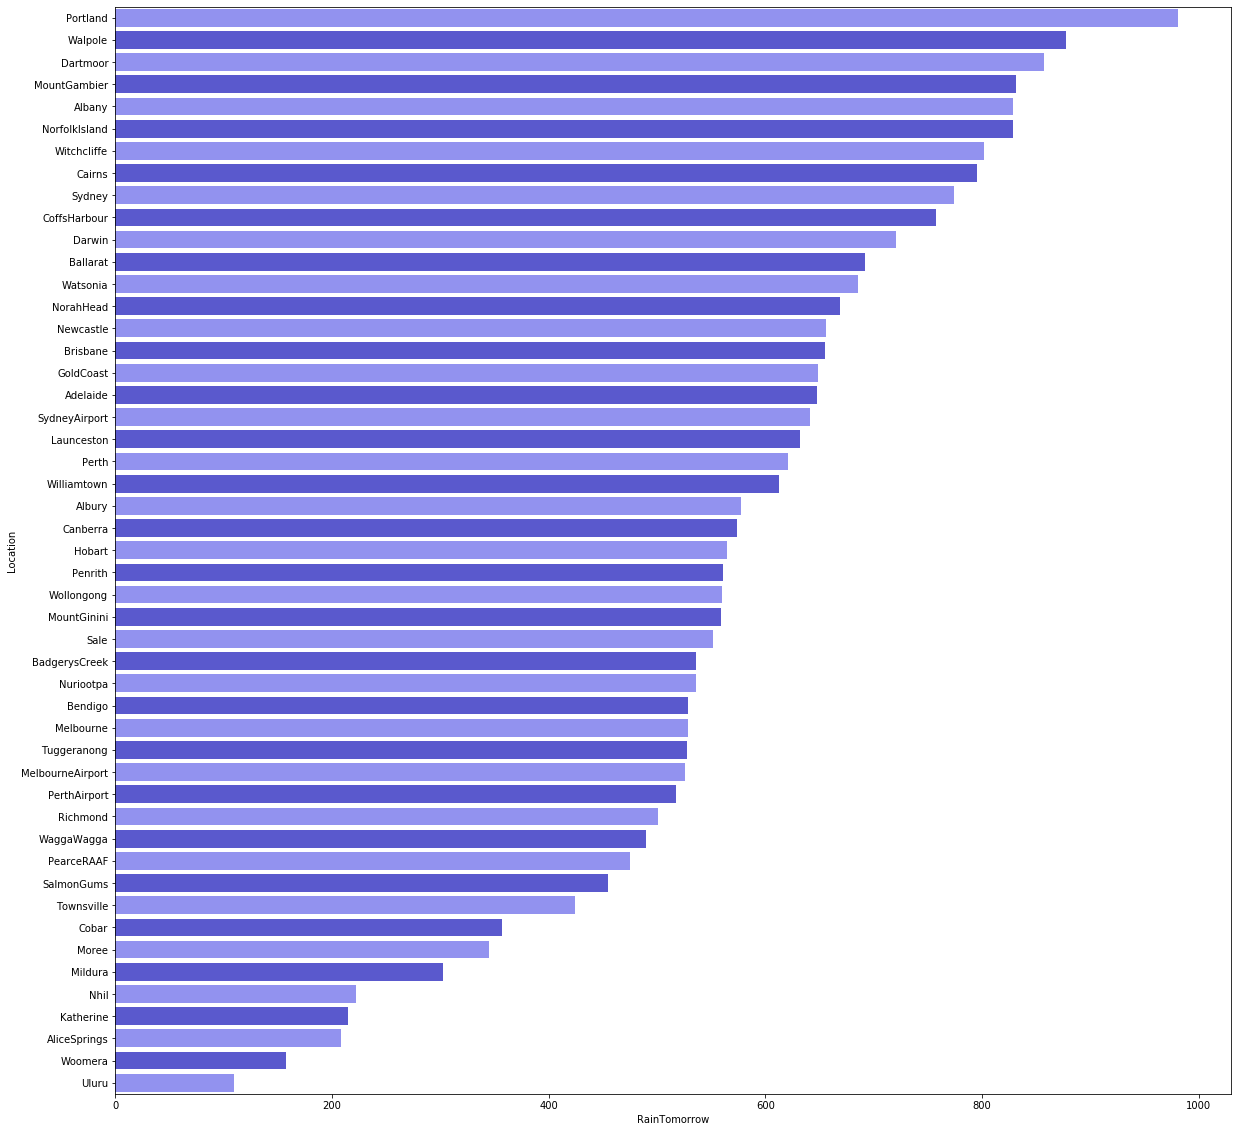

In [198]:
# The city with the most chance of rain is Portland which is legical bacause its the closest city to the sea 
#https://www.google.com/maps/place/%D8%A8%D9%88%D8%B1%D8%AA%D9%84%D8%A7%D9%86%D8%AF+%D9%81%D9%8A%D9%83%D8%AA%D9%88%D8%B1%D9%8A%D8%A7+3305%D8%8C+%D8%A3%D8%B3%D8%AA%D8%B1%D8%A7%D9%84%D9%8A%D8%A7%E2%80%AD/@-34.4839794,138.5125665,4.75z/data=!4m5!3m4!1s0xaa9d9868637a0a11:0x50579a430a0d5a0!8m2!3d-38.3380167!4d141.6041331
f, ax = plt.subplots(figsize=(20, 20))
df2= df[(df['RainTomorrow']=='Yes')].groupby('Location',as_index=False).count()
df2=df2.sort_values(['RainTomorrow'],ascending=False)
sns.barplot(data=df2,y='Location',x='RainTomorrow',palette=palette)

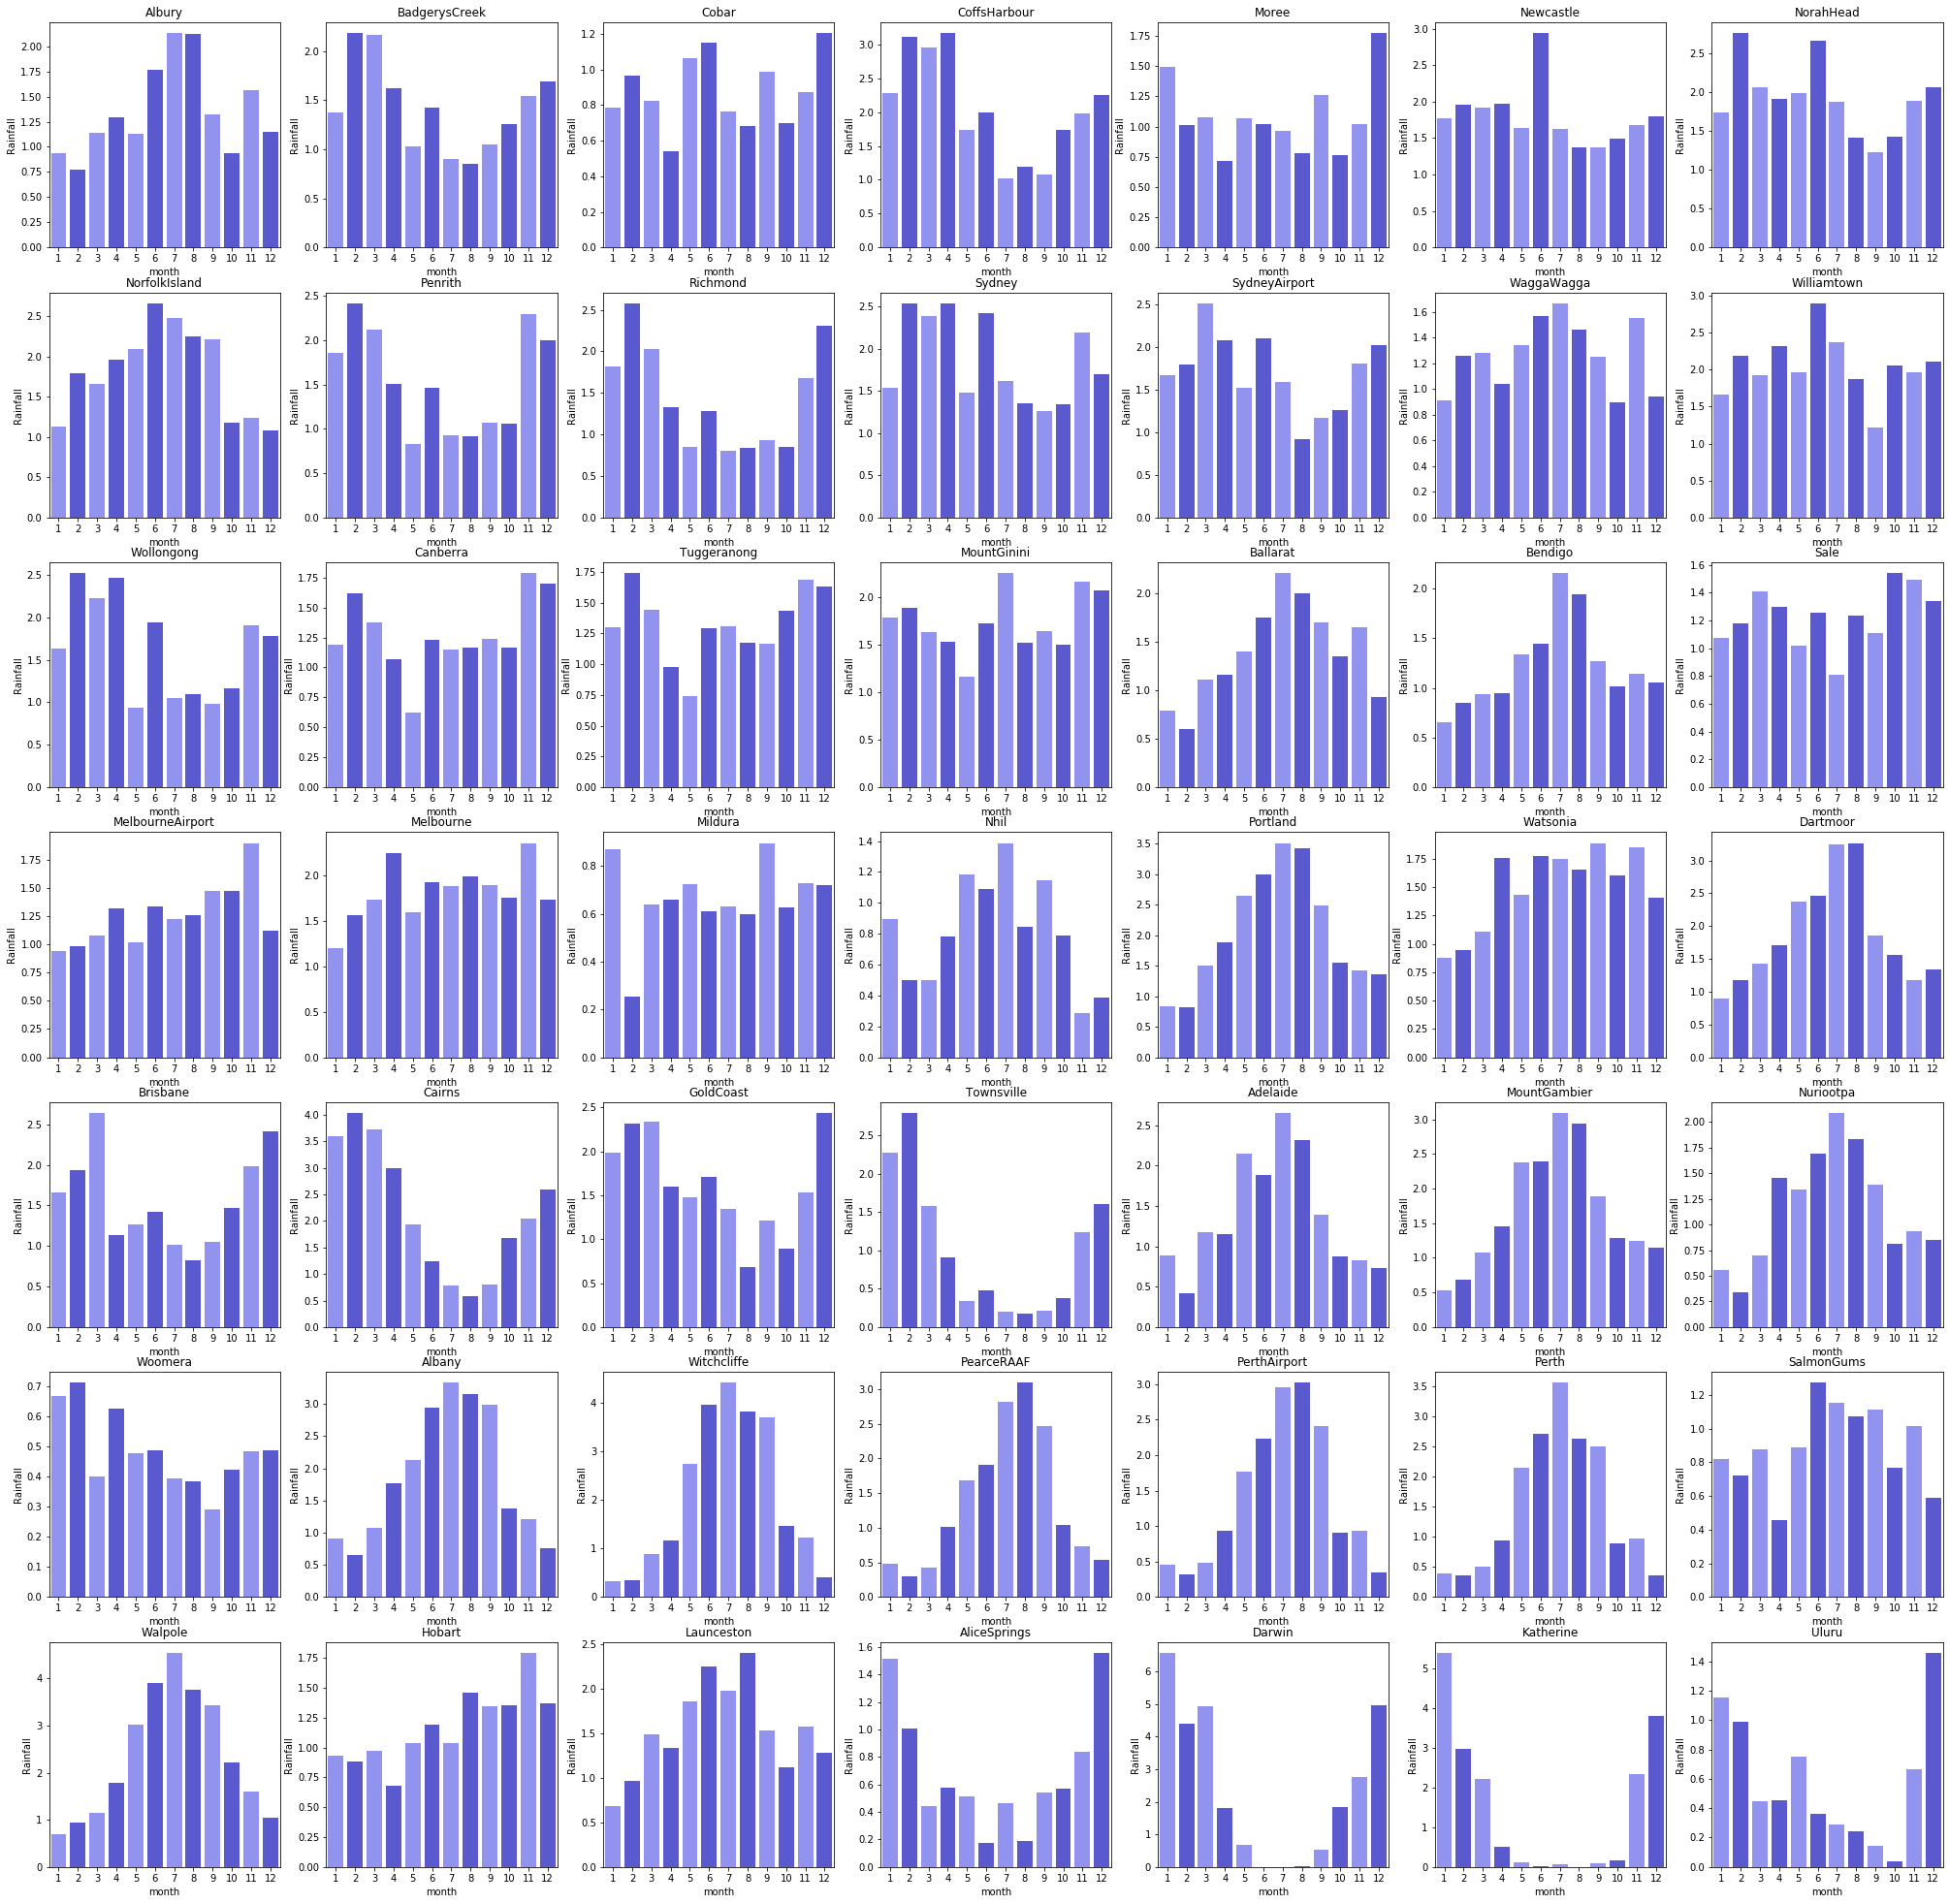

In [199]:
# this chart is consistent with https://www.climatestotravel.com/climate/australia
# shows rainfall for each city in australia around the year
fig, axs = plt.subplots(ncols = 7, nrows = 7, figsize = (35, 35))
index = 0

axs = axs.flatten()
for col in enumerate(df['Location'].unique()):
    df2=df[df['Location']==col[1]].groupby('month',as_index=False).mean()
    axs[index].set_title(col[1])
    sns.barplot(data=df2,y='Rainfall',x='month',palette=palette, ax = axs[index])
    index += 1

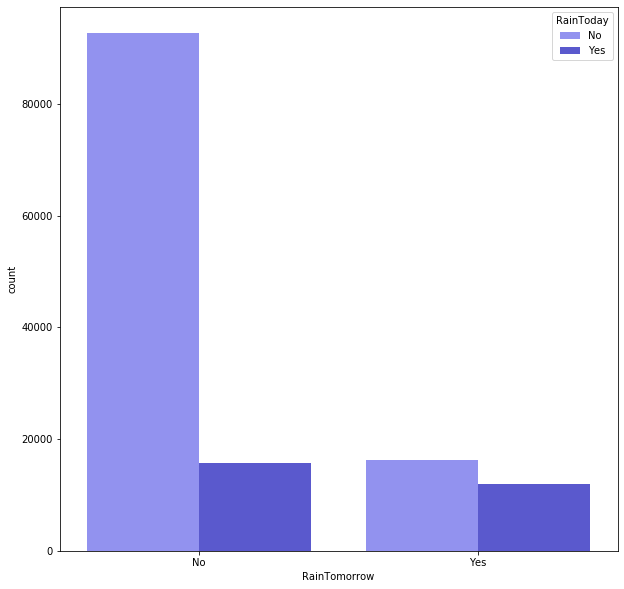

In [200]:
# this plot shows that if it doesn't rain today, its most likely not gonna rain tommorrow
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=df,x='RainTomorrow',palette=palette,hue='RainToday')

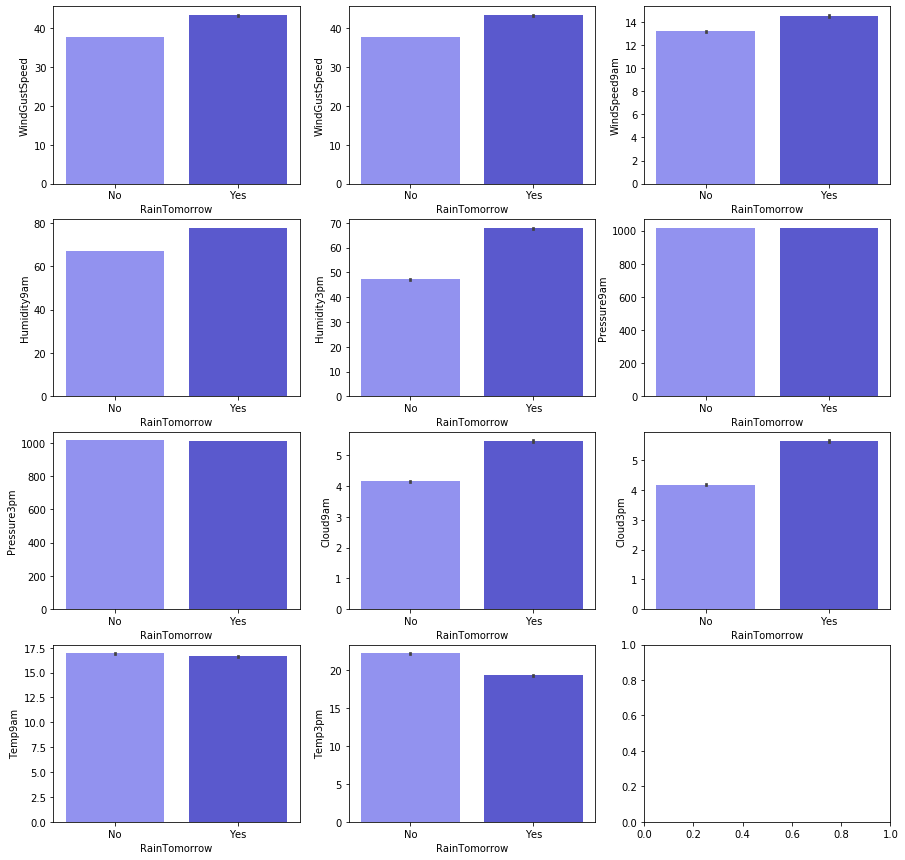

In [201]:
# some features affect the rain in some way by increasing past a threshold
# but some others don't really do anything
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
index = 0

axs = axs.flatten()
for col in ['WindGustSpeed','WindGustSpeed','WindSpeed9am','Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']:
    sns.barplot(data=df,x='RainTomorrow',y=col ,palette=palette, ax = axs[index])
    index += 1

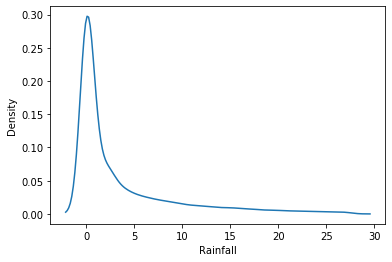

In [205]:
# rainfall this day may not be an indicator that it will rain tomorrow unless its very high
# so it should be almost a storm for this value to be effictive
sns.kdeplot(data=df[df['RainTomorrow']=='Yes'],x='Rainfall')

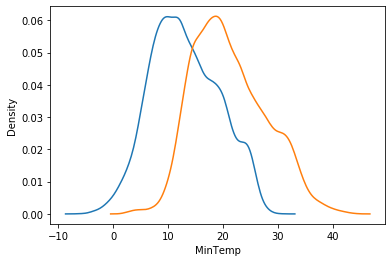

In [235]:
# cooler days tends to have more rainfall 
sns.kdeplot(data=df[df['RainTomorrow']=='Yes'],x='MinTemp')
sns.kdeplot(data=df[df['RainTomorrow']=='Yes'],x='MaxTemp')

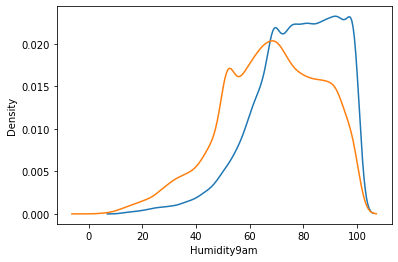

In [233]:
# days with higher humidity tend to have more rainfall especially at 9am 
sns.kdeplot(data=df[df['RainTomorrow']=='Yes'],x='Humidity9am')
sns.kdeplot(data=df[df['RainTomorrow']=='Yes'],x='Humidity3pm')

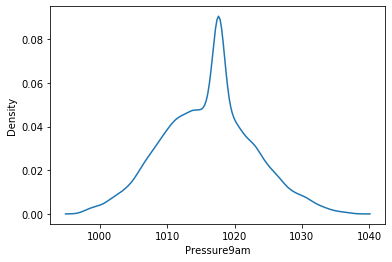

In [234]:
sns.kdeplot(data=df[df['RainToday']=='Yes'],x='Pressure9am')

## 3- Preprocessing

- (3.1) mapping binary features to 0/1

In [209]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [210]:
df[df['RainTomorrow']==1][['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine'
, 'WindGustSpeed', 'Humidity9am', 'Humidity3pm'
, 'Pressure9am', 'Temp9am','RainTomorrow']]

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Temp9am,RainTomorrow
10,13.4,30.4,0.0,7.611178,30.0,48.0,22.0,1011.8,20.4,1
11,15.9,21.7,2.2,7.611178,31.0,89.0,91.0,1010.5,15.9,1
16,14.1,20.9,0.0,7.611178,22.0,69.0,82.0,1012.2,17.2,1
17,13.5,22.9,16.8,7.611178,63.0,80.0,65.0,1005.8,18.0,1
28,19.7,27.2,0.0,7.611178,46.0,49.0,22.0,1004.8,21.6,1
...,...,...,...,...,...,...,...,...,...,...
145321,24.4,37.9,7.6,7.611178,72.0,69.0,35.0,1006.2,27.7,1
145324,24.8,39.8,0.4,7.611178,65.0,38.0,24.0,1007.0,31.5,1
145390,19.3,24.4,0.0,7.611178,35.0,28.0,91.0,1015.9,21.3,1
145391,15.2,21.5,6.8,7.611178,30.0,65.0,65.0,1016.9,19.0,1


- (3.2) label encoding non-binary value features

In [211]:
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])

In [212]:
#col=categorical_col.remove('RainTomorrow')
#df = pd.get_dummies(df, columns=col)

x = df[features]
y=df['RainTomorrow']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=420,stratify=y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## 4- Feature Selection

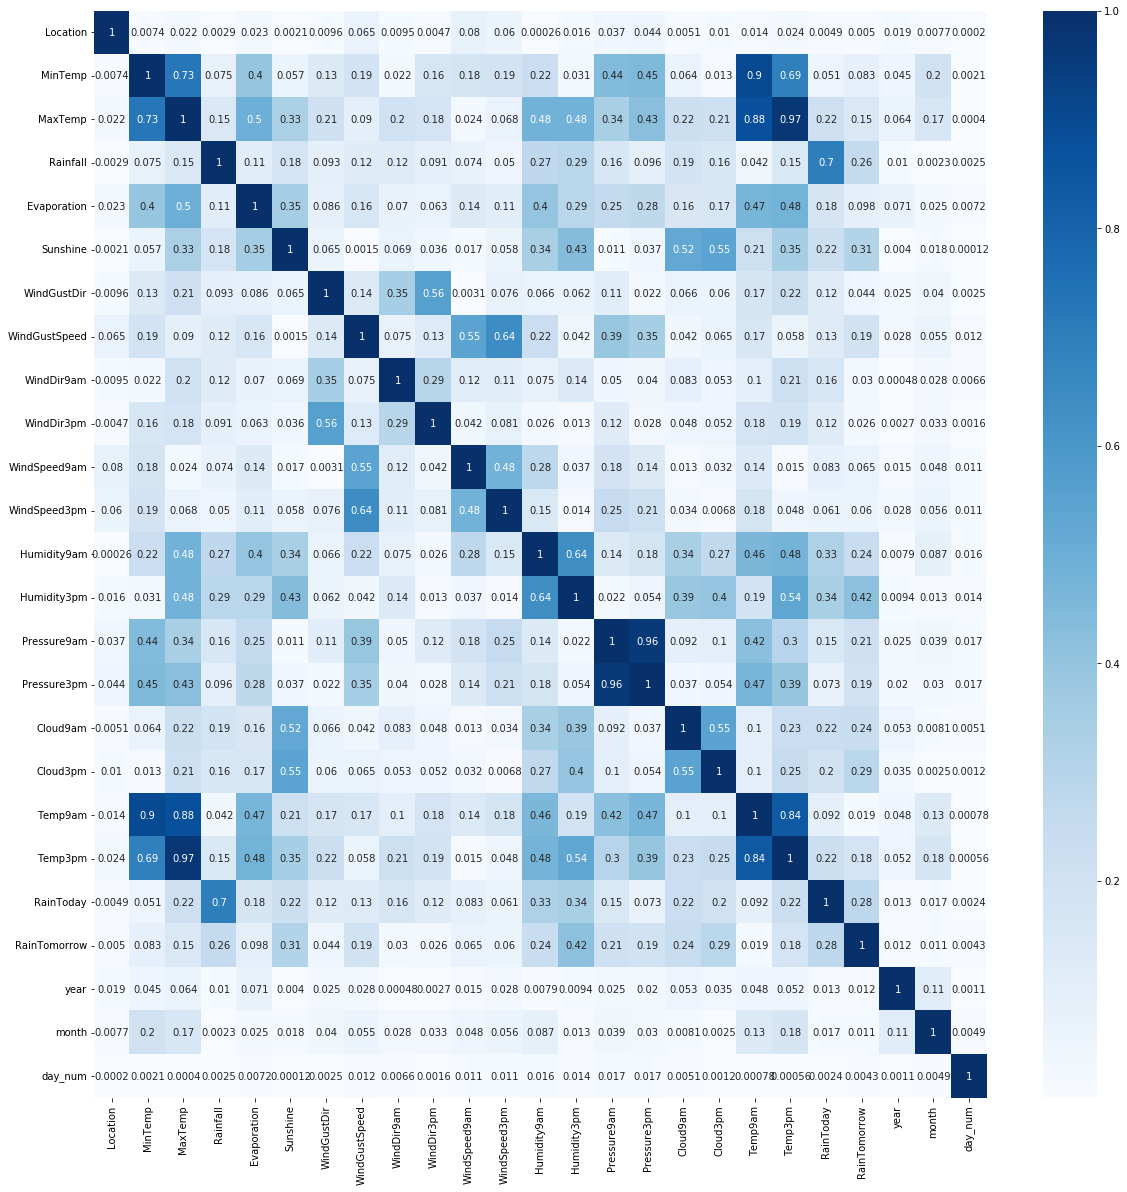

In [213]:
f, ax = plt.subplots(figsize=(20, 20))
corr_matrix = df.corr().abs()
ax=sns.heatmap(corr_matrix, annot=True, cmap = 'Blues')

 - selecting features based on thier correlation
 - Removing highly correlated features
 
 ##### Didnt use correlation with feature selection because the later method yields a higher model performance

In [214]:
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#topfeatures = corr_matrix.index[abs(df.corr()['RainTomorrow'])>=0.2]
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df.drop(df[to_drop], axis=1,inplace=True)

In [215]:
to_drop

['Pressure3pm', 'Temp3pm']

 - (4.1) selecting features based on thier imortance (using RandomForestClassifier)

In [216]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(x, y)
support = selector.get_support()
features = x.loc[:,support].columns.tolist()
print(features)
print(RandomForestClassifier(n_estimators=100, random_state=0).fit(x,y).feature_importances_)

['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp9am']
[0.03569988 0.04986811 0.0510968  0.04770543 0.02717336 0.05685672
 0.02990276 0.05524876 0.0307798  0.03152931 0.03315322 0.0354789
 0.05422551 0.16281198 0.06740007 0.02306954 0.03939862 0.04780763
 0.02680455 0.02758286 0.02749469 0.03891151]


- (4.2) train test splitting
- (4.3) feature scalling

In [218]:
x = df[features]
y=df['RainTomorrow']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=420,stratify=y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## 5- Dealing with imbalanced classes

0    79.407502
1    20.592498
Name: RainTomorrow, dtype: float64

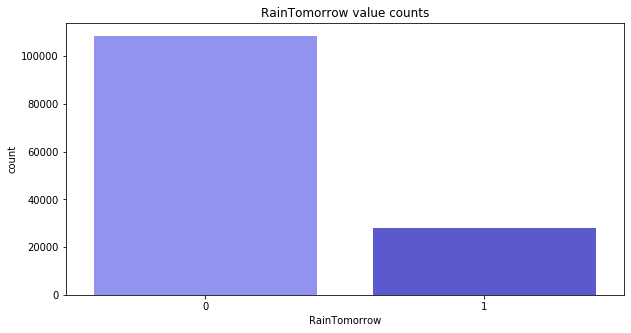

In [217]:
plt.figure(figsize=(10,5))
plt.title('RainTomorrow value counts')
sns.countplot(x=df['RainTomorrow'],palette=palette);
df['RainTomorrow'].value_counts() * 100 / len(df)

- (5.1) Under Sampling

In [219]:
UnderSampler = RandomUnderSampler(random_state=27)
x_under, y_under = UnderSampler.fit_resample(x_train, y_train)
y_under.value_counts()

1    19692
0    19692
Name: RainTomorrow, dtype: int64

- (5.2) Over Sampling (SMOTE)

In [220]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
OverSampler = KMeansSMOTE(k_neighbors=5,n_jobs=-1)
x_over, y_over = OverSampler.fit_resample(x_train, y_train)
y_over.value_counts()

1    75933
0    75933
Name: RainTomorrow, dtype: int64

- (5.3) Over Sampling (SKlearn resample)

In [221]:
# if done before train test split leads to data leakage
# if done after leads to poor acuracy
#no = df_train[df_train['RainTomorrow'] == 0]
#yes = df_train[df_train['RainTomorrow'] == 1]
#yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
#df_train = pd.concat([no, yes_oversampled])
#df_train['RainTomorrow'].value_counts()

- (5.4) Leaving The data As it is

In [222]:
y_train.value_counts()

0    75933
1    19692
Name: RainTomorrow, dtype: int64

## 6- Model Selection / Parameter tuning

- (5.1) Trying diffrent Models
- (5.1.1) trying models with undersampling

In [223]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'XGBoost':XGBClassifier(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
}
print('=======================')
print('== Undersampled Data ==')
print('=======================')
for name,model in models.items():
    model.fit(x_under, y_under)
    y_pred = model.predict(x_test)
    print('\n=======================')
    print(name,'\n=======================')
    print('\t      Accurcy : ',accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred),'\n')
    print('\n------------------------------------------')

== Undersampled Data ==

LogisticRegression 
	      Accurcy :  0.7700021960325013
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     32544
           1       0.46      0.74      0.57      8439

    accuracy                           0.77     40983
   macro avg       0.69      0.76      0.71     40983
weighted avg       0.83      0.77      0.79     40983
 


------------------------------------------

DecisionTreeClassifier 
	      Accurcy :  0.6890905985408584
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     32544
           1       0.37      0.69      0.48      8439

    accuracy                           0.69     40983
   macro avg       0.63      0.69      0.63     40983
weighted avg       0.79      0.69      0.72     40983
 


------------------------------------------

XGBoost 
	      Accurcy :  0.7769562989532245
              precision    recall  f1-score   support

        

- (5.1.2) trying models with oversampling Using SMOTE

In [224]:

models = {
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'XGBoost':XGBClassifier(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
}
print('=======================')
print('== Oversampled Data  ==')
print('=======================')
for name,model in models.items():
    model.fit(x_over, y_over)
    y_pred = model.predict(x_test)
    print('\n=======================')
    print(name,'\n=======================')
    print('\t      Accurcy : ',accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred),'\n')
    print('\n------------------------------------------')

== Oversampled Data  ==

LogisticRegression 
	      Accurcy :  0.8310518995681137
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     32544
           1       0.61      0.49      0.55      8439

    accuracy                           0.83     40983
   macro avg       0.74      0.71      0.72     40983
weighted avg       0.82      0.83      0.82     40983
 


------------------------------------------

DecisionTreeClassifier 
	      Accurcy :  0.7774443061757313
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     32544
           1       0.46      0.52      0.49      8439

    accuracy                           0.78     40983
   macro avg       0.67      0.68      0.67     40983
weighted avg       0.79      0.78      0.78     40983
 


------------------------------------------

XGBoost 
	      Accurcy :  0.8220237659517361
              precision    recall  f1-score   support

        

In [112]:
params = { 
    'max_depth' : [10,50,100],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[1],
    'min_samples_leaf':[3,6,9]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring = 'accuracy', cv = 5, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=3, n_jobs=1; total time=   8.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=3, n_jobs=1; total time=   8.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=3, n_jobs=1; total time=   8.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=3, n_jobs=1; total time=   7.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=3, n_jobs=1; total time=   7.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=6, n_jobs=1; total time=   7.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=6, n_jobs=1; total time=   7.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=6, n_jobs=1; total time=   7.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=6, n_jobs=1; total time=   7.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=6, n_jobs=1; total time=   7.8s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=9, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'min_samples_leaf': [3, 6, 9], 'n_jobs': [1]},
             scoring='accuracy', verbose=2)

In [225]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.850311111111111
{'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 6, 'n_jobs': 1}
[[30595  1949]
 [ 4388  4051]]
0.6751666666666667
0.48003317928664535
0.5611191910797148


In [121]:
model=grid_search.best_estimator_

In [124]:
import joblib
model=grid_search.best_estimator_
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']